# Problem 1: 
In the following examples, identify the false positives and false negatives. Also explain from a business point of view, which error we would like to minimize. You may choose to justify your answer.
        
1. A cell phone company wants to identify customers that will churn and run a marketing campaign to prevent them from churning Churning means a customer will leave a company for another company. For example, I am currently an AT&T customer, but after my contract ends, I may swtich to T-mobile. This is called churning. Losing a customer will cost a lot of money to the cell phone company.

2. A funding organisation receives 1000's of proposals for 5-year funding of $500,000. But the organization can fund only a few proposals. They want to identify the best possible proposals from the list of many proposals.

# Answer

1. In the first scenario, a cell phone company aims to identify customers likely to churn to target them with marketing efforts to retain their business. Here, a false positive would occur when a customer is predicted to churn but had no intention of leaving and this results in unnecessary marketing expenditures. A false negative happens when a customer who intends to leave is mistakenly identified as staying, leading to lost revenue and market share. From a business viewpoint, minimizing false negatives is critical, as retaining an existing customer is usually more cost-effective and beneficial than acquiring new customers. Hence, it's more important to minimize false negatives, since failing to identify customers who churn directly translates into lost revenue and reduced customer lifetime value.

2. In the second scenario, a funding organization receives thousands of proposals requesting significant funding, but can only fund a few. In this case, a false positive would mean funding a low-quality proposal mistakenly identified as high-quality, thereby wasting substantial financial resources and potentially missing an opportunity to fund a genuinely impactful proposal. A false negative, on the other hand, would occur when a high-quality proposal is incorrectly rejected, meaning the organization misses out on potentially valuable research outcomes or innovations. From a business standpoint, minimizing false positives is more critical. Resources are finite and should be allocated to projects with the highest likelihood of success and impact. Funding suboptimal proposals would severely limit the organization's effectiveness and reduce the return on investment of their funds.

# Problem 2: 
We build a machine learning model to predict if an email is spam or not. The following table shows the confusion matrix of the model. Calculate the False positive rate, True positive rate for the matrix and interpret the results in the context of the problem.

|     |  |Prediction| |
|-----|--|----|------|
|     |  | Spam| Not Spam |
|Truth|Spam| 100   |  50  |
|     |Not Spam |  150  | 700  |

In [3]:
# Answer

# Confusion matrix values
TP, FN, FP, TN = 100, 50, 150, 700

# Calculating FPR and TPR
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# Output results
print(f"False Positive Rate (FPR): {FPR:.4f} ({FPR*100:.2f}%)")
print(f"True Positive Rate (TPR): {TPR:.4f} ({TPR*100:.2f}%)")

False Positive Rate (FPR): 0.1765 (17.65%)
True Positive Rate (TPR): 0.6667 (66.67%)


# Problem 2: Spam Classification Model Evaluation

The confusion matrix provided above shows that the model correctly classified 100 spam emails but misclassified 50 spam emails as not spam. Additionally, it correctly classified 700 non-spam emails while incorrectly marking 150 non-spam emails as spam. To evaluate the model's performance, we calculate the FPR and TPR. The False Positive Rate represents the proportion of legitimate emails that were incorrectly classified as spam. It is calculated as the number of false positives divided by the total number of actual non-spam emails. Using the formula:

$[
FPR = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} = \frac{150}{150 + 700} = \frac{150}{850} \approx 0.1765 \quad (17.65\%)
]$

This result indicates that approximately 18% of non-spam emails were mistakenly classified as spam, which could lead to legitimate messages being incorrectly filtered into spam folders. This can be problematic in business and personal communication, as important emails may go unnoticed. The True Positive Rate measures the proportion of actual spam emails that the model correctly identified. It is calculated as the number of true positives divided by the total number of actual spam emails. Using the formula:

$[
TPR = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} = \frac{100}{100 + 50} = \frac{100}{150} \approx 0.6667 \quad (66.67\%)
]$

This result suggests that about 67% of actual spam emails were correctly classified as spam, meaning that one-third of spam emails still made it into the inbox and from a business perspective, both types of errors have different implications. A high False Positive Rate means that legitimate emails are wrongly identified as spam, potentially causing missed opportunities, communication failures, and dissatisfaction among users. On the other hand, a high False Negative Rate means that spam emails continue to appear in users' inboxes, which can lead to inconvenience, security risks, and phishing attempts. While both rates should be minimized, businesses typically prioritize reducing the False


# Problem 3: Confusion matrix and the effect of thresholding


In this problem, you will fit a logistic regression model to the diabetes dataset (from the previous home work) and evaluate the effect of different threshold in the false positve rate and true positive rate. 

In [ ]:
#Step 1: Import all the required libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [ ]:
# Step 2: Load the diabetes dataset and print the first 5 rows

In [20]:
file_path = "diabetes.csv"

df = pd.read_csv(file_path)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Step 3: Create the X and y variables of features and outcome respectively. 
# Use "glucose", "BMI" and "Pregnancies" as the features

In [22]:
X = df[["Glucose", "BMI", "Pregnancies"]]
y = df["Outcome"]

In [ ]:
# Step 4: Create the logistic regression model (make sure to set penality = "none"). 
#Also create the Kfold cross validation object with 5 splits.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

model = LogisticRegression(penalty="none", solver="lbfgs", max_iter=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Step 5: Use cross_val_predict to compute the predicted probabilites 
#using the model and cross validation splits created in Step 4 and the features and outcome in Step 3

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict

model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_probs = cross_val_predict(model, X, y, cv=kf, method="predict_proba")[:, 1]


In [ ]:
# Step 6: Use a threshold of 0.2 to compute the class lables. 
#Make sure to use the second column of the predicted probability from Step 5.

In [34]:
threshold = 0.2
y_pred = (y_probs >= threshold).astype(int)

In [ ]:
# Step 7: Compute the confusion matrix and plot the confusion matrix.

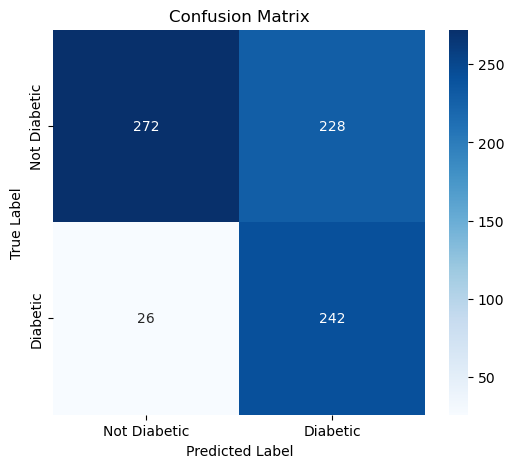

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Diabetic", "Diabetic"], yticklabels=["Not Diabetic", "Diabetic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [48]:
#Step 8: The function below  computes the false positve rate, true positive rate and the precision
# using the confusion matrix. Use it to compute these metrics for threhsold = 0.2


def compute_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    return FPR, TPR, Precision

FPR, TPR, Precision = compute_metrics(cm)
print(f"False Positive Rate: {FPR:.4f}")
print(f"True Positive Rate: {TPR:.4f}")
print(f"Precision: {Precision:.4f}")

False Positive Rate: 0.4560
True Positive Rate: 0.9030
Precision: 0.5149


In [50]:
# The following function computes the true positive rate, false positive rate and precision. 
# You can either use the function to compue tp and fp rates, or use the method we learned in class.
#Input to the function:
#    y_true = an array of true class labels
#    pred_prob = an array of predicted probability of class 1
#    threshold 

def fpr_tpr_pr(y_true, pred_prob, threshold):
    y_pred_t1 = (pred_prob > threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred_t1)
    TN, FP, FN, TP = cm.ravel()
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    print(f"For threshold: {threshold}")
    print(f"False Positive Rate: {FPR:.4f}")
    print(f"True Positive Rate: {TPR:.4f}")
    print(f"Precision: {Precision:.4f}")

fpr_tpr_pr(y, y_probs, 0.2)

For threshold: 0.2
False Positive Rate: 0.4560
True Positive Rate: 0.9030
Precision: 0.5149


In [ ]:
def fpr_tpr_pr(y_true, pred_prob, threshold):
    y_pred_t1 = (pred_prob > threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred_t1)
    TN, FP, FN, TP = cm.ravel()
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    print(f"For threshold: {threshold}")
    print(f"False Positive Rate: {FPR:.4f}")
    print(f"True Positive Rate: {TPR:.4f}")
    print(f"Precision: {Precision:.4f}")

fpr_tpr_pr(y, y_probs, 0.2)

In [ ]:
#Step 9: Now compute the fpr and tpr for a threshold of 0.1 and 0.05. 

In [52]:
fpr_tpr_pr(y, y_probs, 0.1)
fpr_tpr_pr(y, y_probs, 0.05)

For threshold: 0.1
False Positive Rate: 0.7440
True Positive Rate: 0.9813
Precision: 0.4142
For threshold: 0.05
False Positive Rate: 0.9220
True Positive Rate: 0.9888
Precision: 0.3650


In [ ]:
# Step 10. Fill in the blanks below:

#Threshold = 0.2, fpr = 0.456, tpr = 0.9029
#Threshold = 0.1, fpr = 0.744, tpr = 0.9813
#Threshold = 0.05, fpr = 0.922, tpr = 0.9888


In [ ]:
 #As a doctor, you want to make sure that the classifier is able to identify as many potential diabetic patients 
    #as possible, but at the same time not have too many false positives. 
    #Which threshold out of 0.05, 0.1,0.2,would you pick? Please justify your answer

The best choice is threshold 0.1 because it correctly identifies 98% of diabetic patients while keeping false positives lower than the 0.05 threshold. A lower threshold (0.05) catches almost all diabetic cases but misclassifies too many non-diabetic patients, causing unnecessary concern. A higher threshold (0.2) reduces false positives but misses more actual diabetic cases. The 0.1 threshold strikes a good balance, ensuring most diabetic patients get identified while keeping false alarms at a more manageable level.

In [54]:
# Step 11: Using the same function fpr_tpr_pr, calcuate the precision and recall for threshold = 0.5 and 0.8
#  Hint : Recall is the same as True positive rate

fpr_tpr_pr(y, y_probs, 0.5)
fpr_tpr_pr(y, y_probs, 0.8)

For threshold: 0.5
False Positive Rate: 0.1220
True Positive Rate: 0.5634
Precision: 0.7123
For threshold: 0.8
False Positive Rate: 0.0220
True Positive Rate: 0.2052
Precision: 0.8333


In [ ]:
# Fill in the following blanks:

#Threshold = 0.1, precision = 0.4142, recall = 0.9813
#Threshold = 0.5, precision = 0.7123, recall = 0.5634
#Threshold = 0.8, precision = 0.8333, recall = 0.2052

In [ ]:
#Step 12: As a pima indian, you want to make sure that if the classifer predicts that you have diabetes, 
    # the probability that you really have diabetes is high. You dont care about other metrics.
    #Which threshold out of 0.1, 0.5, 0.8 would you pick? Please justify your answer

The best choice is threshold 0.8 because it has the highest precision (83%). This means that if the model says you have diabetes, there is an 83% chance that the prediction is accurate. A lower threshold like 0.1 has a much lower precision (41%), meaning many non-diabetic people would be incorrectly told they have diabetes. Choosing 0.8 gives you the most confidence that a positive result is truly correct.

In [ ]:
# Do you notice how the threshold is different for the doctor and the pima indian?

Yes, the best threshold is different because the doctor and the Pima Indian have different priorities. The doctor wants to catch as many diabetic patients as possible while minimizing false positives, so a moderate threshold like 0.1 is best. In contrast, the Pima Indian wants to be sure that if they are diagnosed with diabetes, the prediction is highly accurate, which means prioritizing precision with a higher threshold like 0.8. This shows how the right threshold depends on the specific needs and risks of the person using the model.

# Problem 4 - TP and FP rate for threshold of 0 and 1

1. What is the true positive rate if the theshold is 1? Please justify your answer.
2. What is the false postivie rate if the threshold is 1? Please justify your answer.

# your answer here

When the threshold is set to 1, the model only predicts diabetes if it is 100% confident, which almost never happens. As a result, it never predicts anyone as diabetic, meaning that all actual diabetic cases are missed. This makes the true positive rate (TPR) 0%, since no diabetic patients are correctly identified. At the same time, the false positive rate (FPR) is also 0% because the model never incorrectly predicts a non-diabetic person as diabetic. While this setting ensures no false positives, it completely fails at detecting diabetes, making it an impractical threshold for real-world use.

# Problem 5 -  ROC curve and PR curve

### Part 1
Create a ROC curve for the logistic regression model to predict diabetes using Glucose, BMI and Pregnancies. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

### Part 2: 
What is the area under the curve? How does this compare with a random classifier?

In [56]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y, y_probs)

print(f"AUC: {roc_auc:.2f}")
print("AUC for random classifier: 0.50")
print("Model performs better than random guessing.")

AUC: 0.82
AUC for random classifier: 0.50
Model performs better than random guessing.


### Part 3: 
From the curve, if you want to maximize the true positive rate, what is the minumum false positive rate that you have to settle for? (Approximate value is is ok)

From the ROC curve, if you want to maximize the TPR to nearly 1, the minimum FPR you have to settle for is approximately 0.4. This means that in order to correctly identify almost all diabetic cases, about 40% of non-diabetic cases will be misclassified as diabetic.

### Part 4:
Create a precision-recall curve for the same model. The same code is given forn you

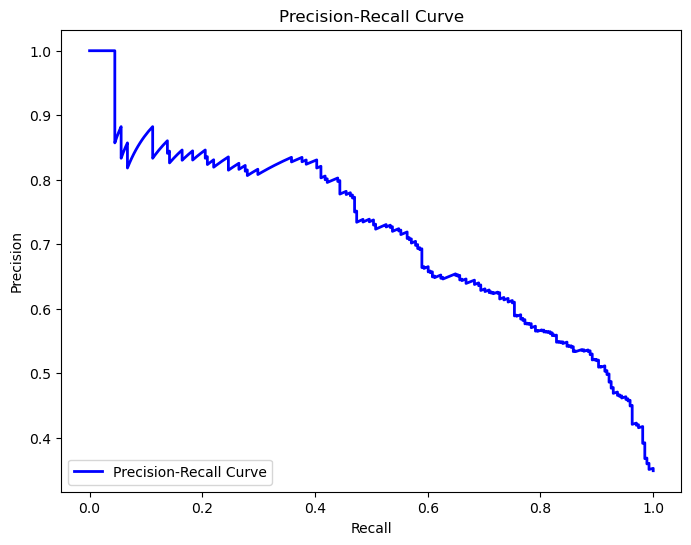

In [58]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

###  Part 5: 
If you want a precision of 80 percent, what is the best recall you can get?
 On the other hand, if you want a reall of 80 percent, what is the best precision you can get?
Approximate value is ok!

The best recall you can achieve is around 44%, meaning that while most positive predictions will be correct, the model will miss many actual diabetic cases. On the other hand, if you prioritize a recall of 80%, the highest precision you can get is about 57%, meaning the model will correctly identify most diabetic cases but also include more false positives. This trade-off highlights the challenge in balancing precision and recall, where increasing one often leads to a decrease in the other.